<h2>Grid Search Cross Validation</h2>

### PARAMETERS:
#### format: [{params_combination 1},{params_combination 2}, ....]
```parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', "rbf"]}, {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]```

### HOW IT WORKS:
  #### 1. Linear Kernel (without gamma):
  ``` model = SVC(C=0.75, kernel='linear') ```

  #### 2. RBF Kernel (without gamma):
  ``` model = SVC(C=0.25, kernel='rbf') ```

  #### 3. RBF Kernel (with gamma=0.4 and C=0.5):
  ``` model = SVC(C=0.5, kernel='rbf', gamma=0.4) ```

  #### 4. RBF Kernel (with gamma=0.9 and C=1):
  ``` model = SVC(C=1, kernel='rbf', gamma=0.9) ```

  #### 5. RBF Kernel (with gamma=0.2 and C=0.75):
  ``` model = SVC(C=0.75, kernel='rbf', gamma=0.2) ```

<img src="../../images/grid.png">

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("../../datasets/Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   8]
 [  7  82]]


0.925

# Applying K Fold

In [3]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies)
# means of accuracies 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# difference btwn individual data in accuracies 
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# GOOD MODEL DUE TO LESS STD DEV

[0.91666667 0.91666667 0.93333333 0.95       0.93333333 0.88333333
 0.85       0.93333333 0.86666667 0.91525424]
Accuracy: 90.99 %
Standard Deviation: 3.09 %


# Applying Grid Search CV

In [8]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', "rbf"]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

"""
PARAMETERS WILL BE IN THE STRUCTURE:
[{PARAMS_COMBINATION 1}, {PARAMS_COMBINATION 2}, ...]

_____________________
HOW IT WORKS:
1. Linear Kernel (without gamma):
model = SVC(C=0.75, kernel='linear')

2. RBF Kernel (without gamma):
model = SVC(C=0.25, kernel='rbf')

3. RBF Kernel (with gamma=0.4 and C=0.5):
model = SVC(C=0.5, kernel='rbf', gamma=0.4)

4. RBF Kernel (with gamma=0.9 and C=1):
model = SVC(C=1, kernel='rbf', gamma=0.9)

5. RBF Kernel (with gamma=0.2 and C=0.75):
model = SVC(C=0.75, kernel='rbf', gamma=0.2)

"""

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.49 %
Best Parameters: {'C': 0.75, 'gamma': 0.8, 'kernel': 'rbf'}


C:\Users\Amaan M k\AppData\Local\Temp\ipykernel_28300\1221404937.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


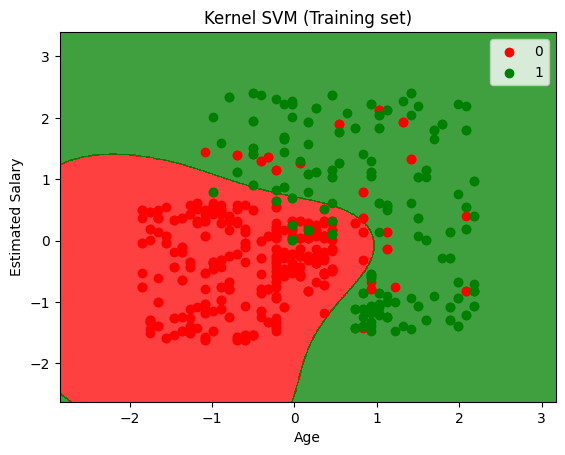

C:\Users\Amaan M k\AppData\Local\Temp\ipykernel_28300\1221404937.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


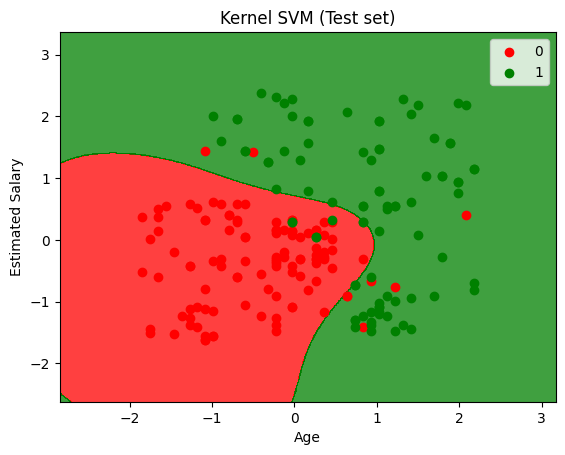

In [5]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()